Image shape (64, 64)


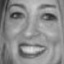

In [67]:
import cv2
import albumentations as A


# Display image from path
def display_image(image_path):
    from PIL import Image
    return Image.open(image_path)

# Read an image to array
def get_image_arr(image_pth):
    return cv2.imread(image_pth)
    
# Transform an image to fit the inference model
def image_transform(image, transform):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return transform(image=image)['image']

transform = A.Compose([
    A.Resize(64, 64),
    A.Normalize(0.449, 0.226)
])

# Define label map {id -> name}
label2id = {'non-smile':0, 'smile':1}
id2label = {v:k for k,v in label2id.items()}
labels = list(label2id.keys())

image_path = './static/image/1.jpg'
image = get_image_arr(image_path)
image = image_transform(image, transform)
print("Image shape", image.shape)

display_image(image_path)

In [68]:
# Get device and convert image array to tensor
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
image = torch.tensor(image).unsqueeze(0).unsqueeze(0).to(device)
image.shape

torch.Size([1, 1, 64, 64])

In [69]:
# Load the inference model
from inference.model import *
inference_model = torch.load('static/saved_models/vgg_inference.pt')
inference_model.eval()
inference_model.to(device)

# Warm up
inference_model(torch.randn(1,1,64,64).to(device))

tensor([[ 0.5601, -0.5327]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [70]:
# Get outputs and normalize
probs = torch.sigmoid(inference_model(image))[0].tolist()
probs_map = {k:v for k, v in zip(labels, probs)}
print(probs_map)

{'non-smile': 0.5134626030921936, 'smile': 0.4885599613189697}
